**Studi Kasus 9: Membersihkan Data Teks Produk**


**Skenario & Data:**
- Anda baru saja menggabungkan data transaksi, tapi saat Anda coba .groupby('nama_produk'), hasilnya aneh. 'Roti Tawar' muncul berkali-kali!
Setelah diselidiki, ternyata data `nama_produk` Anda kotor.

---

In [1]:
import pandas as pd

data = {
    'sku': ['SKU-A', 'SKU-B', 'SKU-C', 'SKU-D', 'SKU-E'],
    'nama_produk': [
        ' Roti Tawar ',      # <-- Ada spasi di awal & akhir
        'SUSU UHT Coklat', # <-- Huruf besar semua
        'Kopi_Bubuk_Kapal_Api', # <-- Pakai underscore
        'roti tawar',      # <-- Huruf kecil
        'Susu UHT Cokelat' # <-- Typo ('Cokelat' vs 'Coklat')
    ],
    'terjual': [10, 5, 8, 3, 2]
}
df = pd.DataFrame(data)

print("--- Data Produk Kotor ---")
print(df)

--- Data Produk Kotor ---
     sku           nama_produk  terjual
0  SKU-A           Roti Tawar        10
1  SKU-B       SUSU UHT Coklat        5
2  SKU-C  Kopi_Bubuk_Kapal_Api        8
3  SKU-D            roti tawar        3
4  SKU-E      Susu UHT Cokelat        2


- Masalahnya: Jika dijalankan jalankan df.groupby('nama_produk')['terjual'].sum(), ' Roti Tawar ' dan 'roti tawar' akan dihitung sebagai dua produk berbeda, padahal sama.

In [2]:
total_penjualan = df.groupby('nama_produk', as_index=False)['terjual'].sum()
print(total_penjualan)

            nama_produk  terjual
0           Roti Tawar        10
1  Kopi_Bubuk_Kapal_Api        8
2       SUSU UHT Coklat        5
3      Susu UHT Cokelat        2
4            roti tawar        3


- Untuk membersihkan ini, kita akan pakai "senjata" khusus Pandas untuk teks, yaitu .str.
- df['kolom'].str.lower(): Mengubah semua teks jadi huruf kecil.
- df['kolom'].str.strip(): Menghapus spasi di awal dan akhir.
- df['kolom'].str.replace('A', 'B'): Mengganti teks 'A' dengan 'B'.

In [3]:
# Coba ini:
df['nama_bersih'] = df['nama_produk'].str.lower().str.strip()

print("\n--- Setelah .lower() dan .strip() ---")
print(df)


--- Setelah .lower() dan .strip() ---
     sku           nama_produk  terjual           nama_bersih
0  SKU-A           Roti Tawar        10            roti tawar
1  SKU-B       SUSU UHT Coklat        5       susu uht coklat
2  SKU-C  Kopi_Bubuk_Kapal_Api        8  kopi_bubuk_kapal_api
3  SKU-D            roti tawar        3            roti tawar
4  SKU-E      Susu UHT Cokelat        2      susu uht cokelat


- Tantangan (Langkah 2: .str.replace())
- Sekarang kita pakai "senjata" baru untuk memperbaiki dua masalah itu di kolom nama_bersih kita.
- Tugas:
- Ambil kolom nama_bersih yang sudah kita buat.
- Ganti semua _ (underscore) dengan spasi ( ).
- Ganti semua typo 'cokelat' (pakai 'e') menjadi 'coklat' (pakai 'a') agar seragam.

In [4]:
df['nama_bersih'] = df['nama_bersih'].str.replace('_', ' ')
df['nama_bersih'] = df['nama_bersih'].str.replace('cokelat', 'coklat')

print("\n--- Setelah .replace() ---")
print(df)


--- Setelah .replace() ---
     sku           nama_produk  terjual           nama_bersih
0  SKU-A           Roti Tawar        10            roti tawar
1  SKU-B       SUSU UHT Coklat        5       susu uht coklat
2  SKU-C  Kopi_Bubuk_Kapal_Api        8  kopi bubuk kapal api
3  SKU-D            roti tawar        3            roti tawar
4  SKU-E      Susu UHT Cokelat        2       susu uht coklat


In [14]:
# df_fix = df.copy()

total_penjualan_fix = df.groupby('nama_bersih', as_index=False)['terjual'].sum()
print(total_penjualan_fix)

            nama_bersih  terjual
0  kopi bubuk kapal api        8
1            roti tawar       13
2       susu uht coklat        7


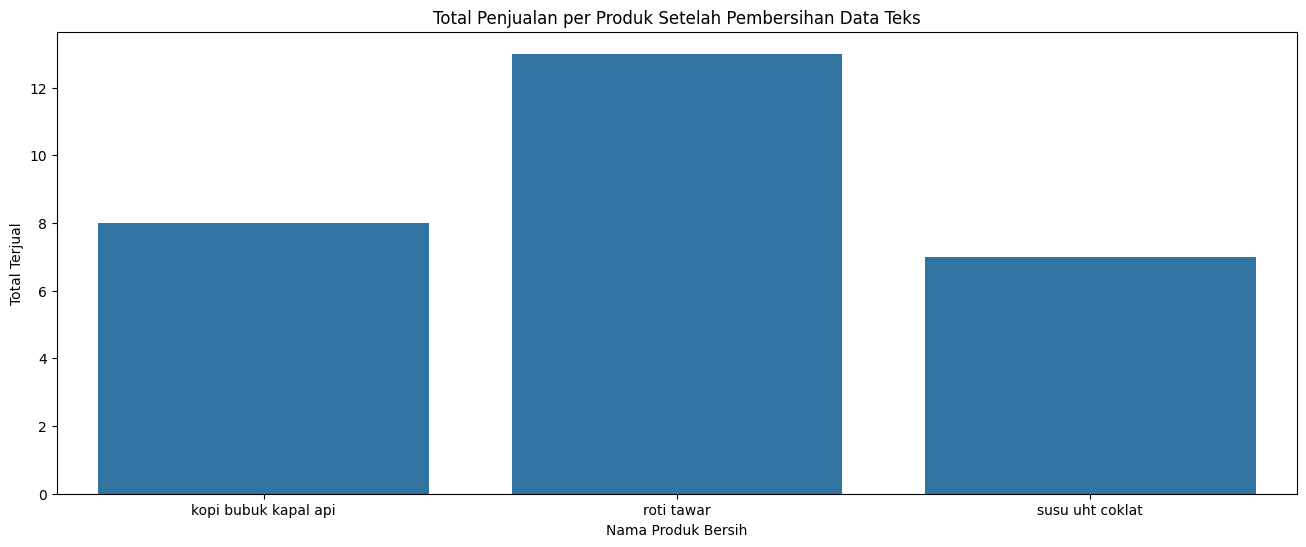

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.barplot(data=total_penjualan_fix, x='nama_bersih', y='terjual')
plt.title('Total Penjualan per Produk Setelah Pembersihan Data Teks')
plt.xlabel('Nama Produk Bersih')
plt.ylabel('Total Terjual')
plt.show()